In [90]:
# Import needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def read_and_split(filename):
    # Read data
    df1 = pd.read_csv(filename)

    # Rename columns
    new_column_names = [
        'Time',  # 0th index
        'US_election',  # 1st index
        'US_election_confidence',  # 2nd index
        'ballon_or',  # 3rd index
        'ballon_or_confidence',  # 4th index
        'halloween_rain',  # 5th index
        'halloween_rain_confidence'  # 6th index
    ]
    df1.columns = new_column_names

    # Set the confidence to null values when the guess was "I don't know"
    for col in df1.columns:
        if col.endswith('_confidence'):
            df1.loc[df1[col.replace("_confidence", "")] == "I don't know", col] = np.nan

    # Split the data into 3 sub-dataframes for each experiment
    us_exp = df1[['US_election', 'US_election_confidence']]
    or_exp = df1[['ballon_or', 'ballon_or_confidence']]
    rain_exp = df1[['halloween_rain', 'halloween_rain_confidence']]

    return [us_exp, or_exp, rain_exp]


In [88]:
def compute_means(dfs):
    res = []
    for d in dfs:
        sub_res = []
        val = d[d.columns[0]].unique()

        for el in val:
            temp_df = d[d[d.columns[0]]==el]
            temp_mean = temp_df[d.columns[1]].mean()
            sub_res.append((el, temp_mean))

        res.append(pd.DataFrame(sub_res))
    return res


In [99]:
def plot_means(means):
    for df in means:
        # Filter out rows where the mean (in column 1) is NaN
        df_filtered = df.dropna(subset=[1])
        
        # Extract values and their corresponding means
        values = df_filtered[0]
        mean_values = df_filtered[1]
        
        # Plot bar chart
        plt.figure(figsize=(8, 6))
        bars = plt.bar(values, mean_values, color='skyblue')
        plt.xlabel('Values')
        plt.ylabel('Mean')
        plt.title('Mean values')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()  # Adjust layout to prevent overlap

        # Add data labels on top of each bar
        for bar, mean in zip(bars, mean_values):
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, yval, round(mean, 2), 
                     ha='center', va='bottom')  # Data label

        
        # Show the plot
        plt.show()



[               0         1
0   Donald Trump  3.833333
1  Kamala Harris  3.894737
2   I don't know       NaN,                            0         1
0  Vinicius Jr (Real Madrid)  4.764706
1               I don't know       NaN
2    Rodri (Manchester City)  3.600000,               0         1
0            No  4.125000
1  I don't know       NaN
2           Yes  4.818182]


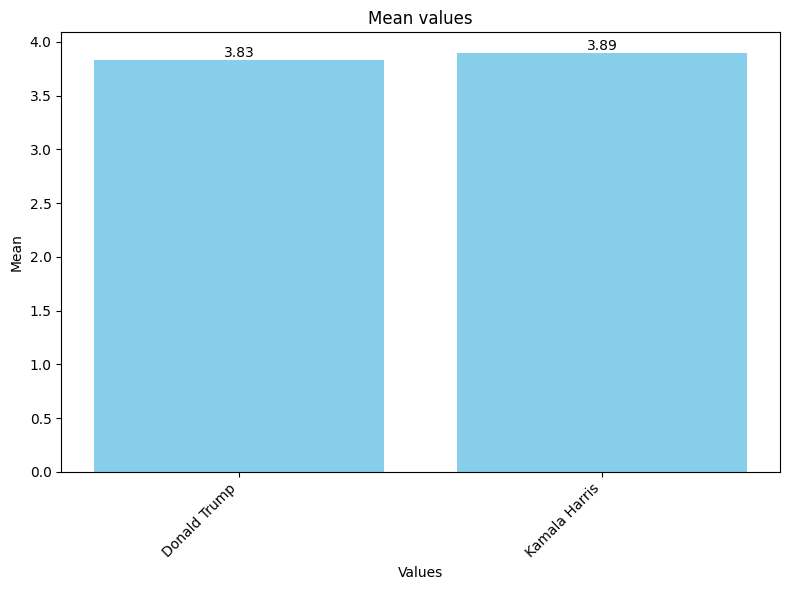

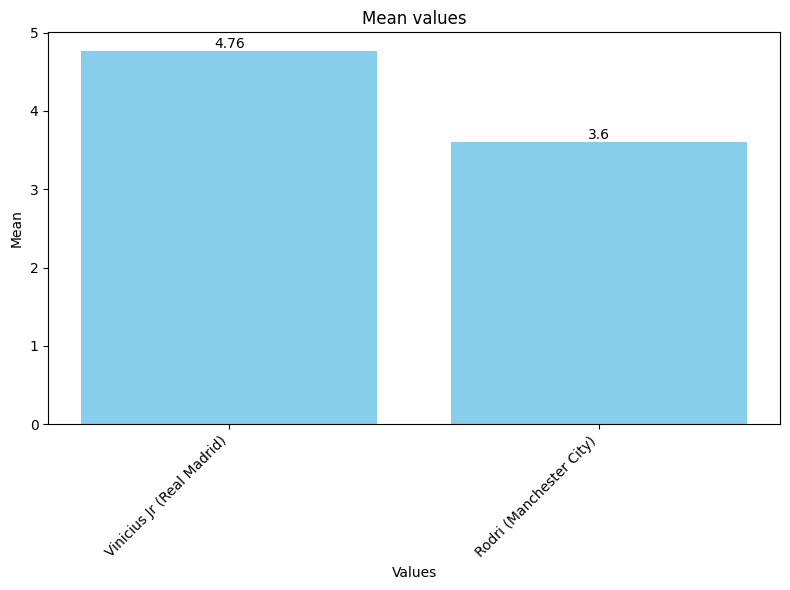

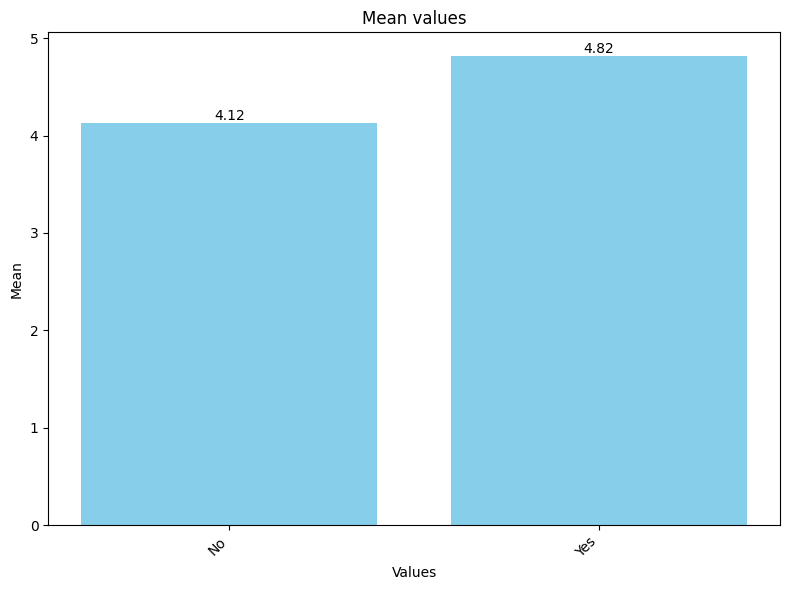

In [100]:
# ------ SURVEY 1 : ------

# Get the three experiments in three dataframes 
dfs = read_and_split('survey1_data.csv')

# Compute the means
means = compute_means(dfs)
print(means)

# TODO : include survey 2

# Plot the means
plot_means(means)